# Homework 1 Rosini Micol

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import cvxpy as cp


In [2]:
# Utils cell

f = scipy.io.loadmat('flow.mat')["flow"].reshape(28,) # Vector of flow
C = scipy.io.loadmat('capacities.mat')["capacities"].reshape(28,) # Vector of capacities
B = scipy.io.loadmat('traffic.mat')["traffic"] # Incidence matrix of the graph
l = scipy.io.loadmat('traveltime.mat')["traveltime"].reshape(28,) # Vector of minimum traveling time

# Function to assign capacity
def assign_cap(G_edge_list, C):
    i = 0
    for el in G_edges_list:
        a = el[0]
        b = el[1]
        G[a][b]['capacity'] = C[i]
        i += 1

# Function to obtain social optimum, Wardrop equilibrium, ecc
def utils_flow_optimization(f, C, B, cost_function):
    
    constraints = [B @ f == nu, f >= 0, f <= C]


    objective = cp.Minimize(cp.sum(cost_function))
    cp.Problem(objective, constraints).solve()
    foi = f.value # Function of interest
    return foi

def gradient_color_edges(function, list_edge_node):
    function = list(function)
    functionsorted = sorted(function)
    quantiles = np.quantile(functionsorted, [0.2, 0.4, 0.6, 0.8] )
    edge_color = ['sandybrown' if functionsorted[el] <= quantiles[0] else 'coral' if  quantiles[0] < functionsorted[el] <= quantiles[1] else 'red' if quantiles[1] < functionsorted[el] <= quantiles[2] else 'firebrick' if quantiles[2] < functionsorted[el] <= quantiles[3] else 'darkred'  for el,(a,b) in enumerate(list_edge_node) ]
    return edge_color

def assign_label_edge(function, list_edge_node):
    d = {}
    for i, e in enumerate(list_edge_node):
        d[e] = function[i]
    return d



## Exercise 3

We are given the highway network in Los Angeles. 
To simplify the problem, an approximate highway map is given in ***Figure 11***, covering part of the real highway network.

The node-link incidence matrix $B$, for this traffic network is given in the file _traffic.mat_. The rows of $B$ are associated with the nodes of the network and the columns of B with the links. The $i-th$ column of B has 1 in the row corresponding to the tail node of link $e_i$ and (−1) in the row corresponding to the head node of link $e_i$. Each node represents an intersection between highways (and some of the area around).


Each link $e_i \in \{e_1, . . . , e_{28}\}$, has a maximum flow capacity $c_{ei}$ . The capacities are given as a vector $c_e$ in the file _capacities.mat_. 


Furthermore, each link has a minimum travelling time $l_{ei}$ , which the drivers experience when the road is empty. In the same manner as for the capacities, the minimum travelling times are given as a vector $l_e$ in the file _traveltime.mat_. These values are simply retrieved by dividing the length of the highway segment with the assumed speed limit 60 miles/hour. 

For each link, we introduce the delay function

$$
\tau_e(f_e) = \frac{l_e}{1 - \frac{f_e}{c_e}},\    0 \leq f_e < c_e
$$


For $f_e \geq c_e$, the value of $\tau_e(f_e)$ is considered as $+\infty$



### Question a

Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path with shortest traveling time) in an empty network.


***Solution***

We can visualize the graph with the following code:

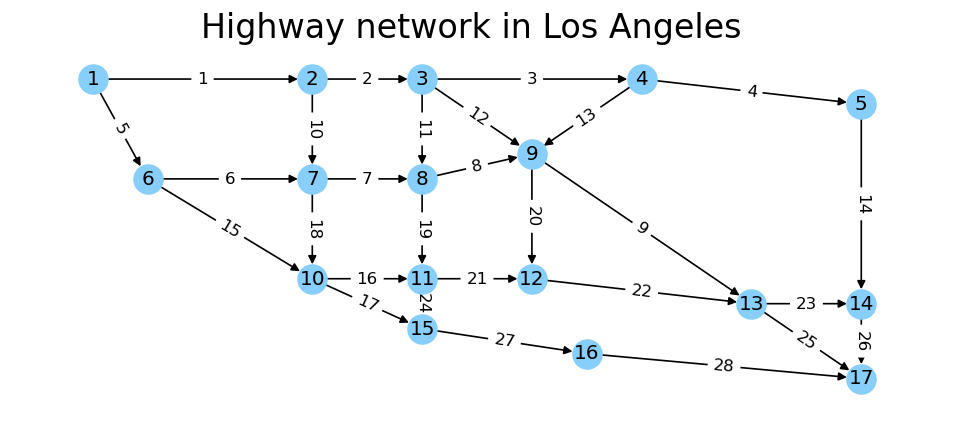

In [3]:
fig, ax = plt.subplots(figsize = (10,4), dpi=120)

G = nx.DiGraph()
G.add_nodes_from(range(1,18))

edge_labels={}
G_edges_list =[]
for i in range(B.shape[1]): #rami
    for j in range(B.shape[0]):#nodi
        
        if B[j][i] == 1:
            tail = j+1
            
        if B[j][i]== -1:
            head = j+1
    G.add_edges_from([(tail,head)])
    edge_labels[(tail,head)] = i+1
    G_edges_list.append((tail,head))
    

    
# Adding the feature weight to the edges
counter = 0
for [a,b] in G_edges_list:
    G[a][b]['weight'] = l[counter]
    counter += 1

# Assign the feature capacity to the edges
assign_cap(G_edges_list, C)
    
    
pos = {1:[0,0], 2:[4,0], 3:[6,0], 4:[10,0], 5:[14, -1], 6:[1,-4], 7:[4,-4],8:[6,-4],9:[8, -3],10:[4, -8],11:[6, -8],12:[8, -8],13:[12, -9],14:[14, -9],15:[6, -10],16:[9, -11],17:[14, -12]
      }

nx.draw(G, pos, with_labels = True, node_color = 'lightskyblue')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

ax.set_title("Highway network in Los Angeles ", fontsize=20)

plt.savefig('fig/graph11.png')




        

Let's calculate the shortest path from $1$ to $17$:

The shortest (fastest) path from 1 to 17 is given by the following nodes:
 [1, 2, 3, 9, 13, 17]

The shortest path is made by the following edges:
 [(1, 2), (2, 3), (3, 9), (9, 13), (13, 17)]


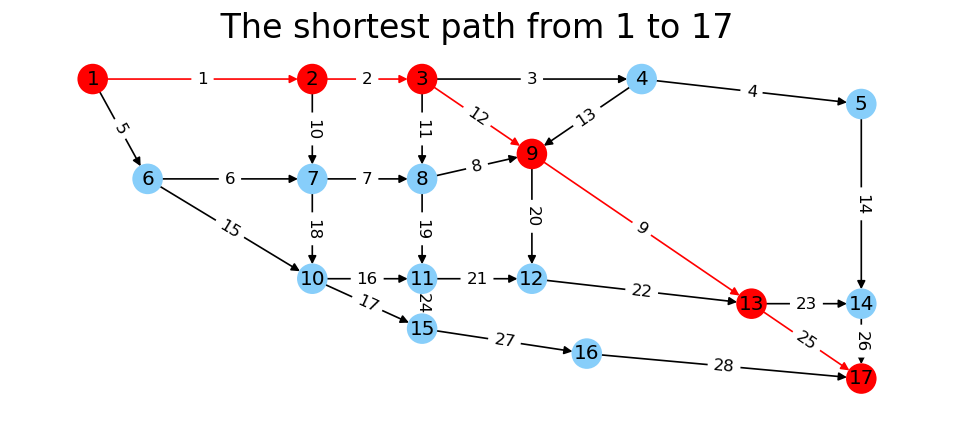

In [4]:
sp = nx.shortest_path(G, 1, 17, weight='weight')
print('The shortest (fastest) path from 1 to 17 is given by the following nodes:\n',sp)
edge_sp = []
for (a,b) in G.edges():
     if a in sp and b in sp:
        edge_sp.append((a,b)) 
print('\nThe shortest path is made by the following edges:\n' , edge_sp)


node_color = ['red' if a in sp else 'lightskyblue' for a in G.nodes()]
fig, ax = plt.subplots(figsize = (10,4), dpi=120)
edge_color = ['red' if a in sp and b in sp else 'black' for (a,b) in G.edges() ]
nx.draw(G, pos, with_labels = True, node_color = node_color, edge_color = edge_color)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

ax.set_title(" The shortest path from 1 to 17 ", fontsize=20)

plt.savefig('fig/graph12.png')





### Question b

Find the maximum flow between node $1$ and $17$.

___Solution___

maximum flow: 22448 
And it can be reached with the following flow distribution:
 {1: {2: 8741, 6: 13707}, 2: {3: 8741, 7: 0}, 3: {4: 0, 8: 0, 9: 8741}, 4: {5: 0, 9: 0}, 5: {14: 0}, 6: {7: 4624, 10: 9083}, 7: {8: 4624, 10: 0}, 8: {9: 4624, 11: 0}, 9: {13: 6297, 12: 7068}, 10: {11: 825, 15: 8258}, 11: {12: 825, 15: 0}, 12: {13: 7893}, 13: {14: 3835, 17: 10355}, 14: {17: 3835}, 15: {16: 8258}, 16: {17: 8258}, 17: {}}


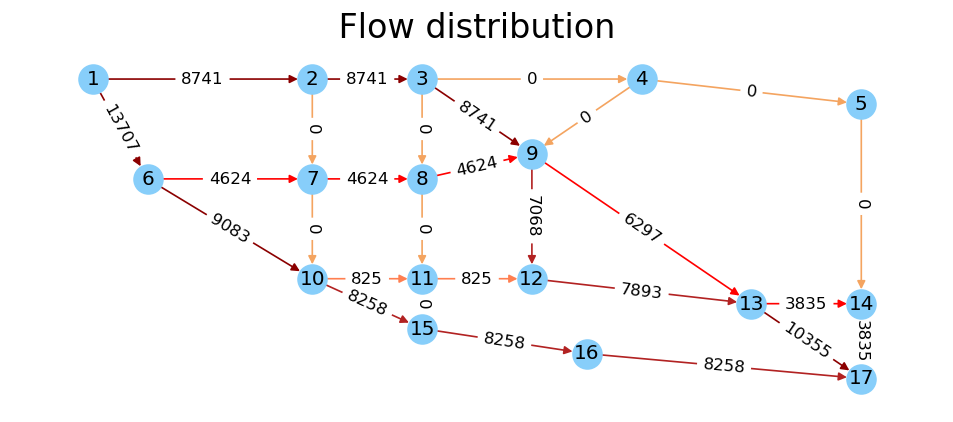

In [5]:
flow, flow_distribution = nx.algorithms.flow.maximum_flow(G, 1,17)
print("maximum flow:", flow, '\nAnd it can be reached with the following flow distribution:\n',flow_distribution)

#fig, ax = plt.subplots(figsize = (10,4), dpi=120)
edges_labels = {}
for k in flow_distribution.keys():
    nodesconnected = flow_distribution[k]
    for key in nodesconnected:
        v = nodesconnected[key]
        edges_labels[(k,key)] = v
edges_labels = {k: v for k, v in sorted(edges_labels.items(), key=lambda item: item[1])}
flowsvalue = list(edges_labels.values())

quantiles = np.quantile(flowsvalue,[0.2, 0.4, 0.6, 0.8])
        
fig, ax = plt.subplots(figsize = (10,4), dpi=120)


edge_color = ['sandybrown' if edges_labels[(a,b)] == quantiles[0] else 'coral' if  quantiles[0] < edges_labels[(a,b)] <= quantiles[1] else 'red' if quantiles[1] < edges_labels[(a,b)] <= quantiles[2] else 'firebrick' if quantiles[2] < edges_labels[(a,b)] <= quantiles[3] else 'darkred'  for (a,b) in G.edges()]
nx.draw(G, pos, with_labels = True, node_color = 'lightskyblue', edge_color = edge_color)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edges_labels)

ax.set_title(" Flow distribution ", fontsize=20)
plt.savefig('fig/graph13.png')



In [6]:
number_of_edges = B.shape[1]
# exogenous flow vector: one unit of flow enters the origin and exits the destination node
# the solution of the shortest path problem is actually independent on the throughput value because of the linearity
tau = 1 #amount of mass entering in the network
nu = np.zeros(len(G.nodes()))
nu[0]= 1
nu[-1]=-1

# l stores the coefficients of the linear terms of the objective function, in this case the length of the links.
# Construct the problem
fl = cp.Variable(number_of_edges)
objective = cp.Minimize(l.T @ fl)
constraints = [B @ fl == nu, fl >=0]
prob = cp.Problem(objective, constraints)
# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Optimal f:", fl.value)

#the flow is all concentarted in the shortest path
optimal_path = []
flows = list(fl.value)
for el in flows:
    if el > 0.1:
        optimalpathnode = flows.index(el) + 1
        optimal_path.append(optimalpathnode)
print("Optimal f edges:", optimal_path)
# Trova un modo per arrivare ai nodi
listofnodes = []
for edge in optimal_path:
    listofnodes.append(G_edges_list[edge-1])
print("Optimal f nodes:", listofnodes)
    




Optimal f: [1.00000000e+00 1.00000000e+00 1.19595586e-11 5.07129566e-12
 1.49988426e-10 1.33658919e-10 8.54100951e-11 3.78266693e-11
 9.99999998e-01 8.90389208e-12 3.91753215e-11 1.00000000e+00
 6.88981434e-12 5.07752202e-12 1.62878397e-11 5.42208640e-11
 1.91831469e-11 5.71274798e-11 8.67469798e-11 1.99611946e-09
 1.29358670e-10 2.12547935e-09 4.14939343e-11 1.16133834e-11
 1.00000000e+00 4.65871714e-11 3.08330688e-11 3.08494486e-11]
Optimal f edges: [1, 2, 9, 12, 25]
Optimal f nodes: [(1, 2), (2, 3), (9, 13), (3, 9), (13, 17)]


### Question c

Given the flow vector in _flow.mat_, compute the external inflow $\nu$ satisfying $Bf = \nu$.


___Solution___

The exogenous net flow vector is [16806, 8570, 19448, 4957, -746, 4768, 413, -2, -5671, 1169, -5, -7131, -380, -7412, -7810, -3430, -23544]

For each node:
node  1 : 16806
node  2 : 8570
node  3 : 19448
node  4 : 4957
node  5 : -746
node  6 : 4768
node  7 : 413
node  8 : -2
node  9 : -5671
node  10 : 1169
node  11 : -5
node  12 : -7131
node  13 : -380
node  14 : -7412
node  15 : -7810
node  16 : -3430
node  17 : -23544


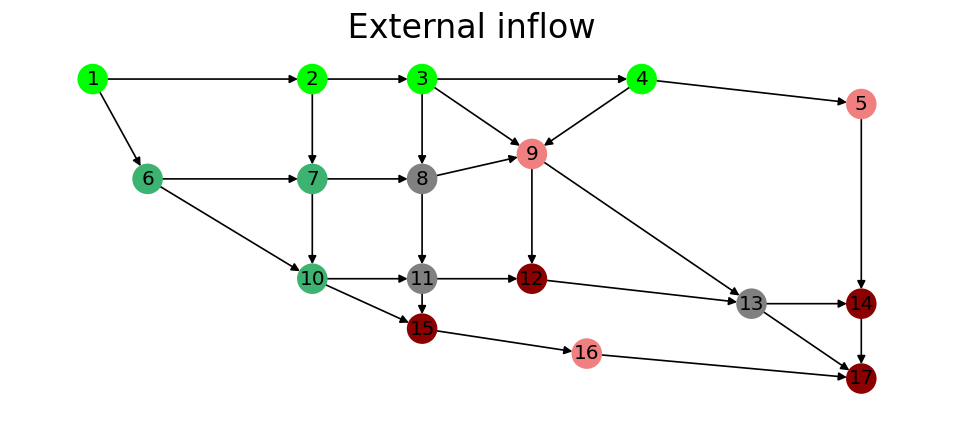

In [7]:
netflow = B @ f
netflow = list(netflow)
print("The exogenous net flow vector is", netflow)

print('\nFor each node:')

for i, n in enumerate(netflow):
    print('node ', i+1 , ':', n)
    i += 1
    
netflowordered = sorted(netflow)


quantiles = np.quantile(netflowordered,[0.2, 0.4, 0.6, 0.8])
        
fig, ax = plt.subplots(figsize = (10,4), dpi=120)


node_color = ['darkred' if netflow[a-1] <= quantiles[0] else 'lightcoral' if  quantiles[0] < netflow[a-1] <= quantiles[1] else 'gray' if quantiles[1] < netflow[a-1] <= quantiles[2] else 'mediumseagreen' if quantiles[2] < netflow[a-1] <= quantiles[3] else 'lime'  for a in G.nodes()]

nx.draw(G, pos, with_labels = True, node_color = node_color)
#nx.draw_networkx_edge_labels(G,pos)

ax.set_title(" External inflow  ", fontsize=20)
plt.savefig('fig/graph14.png')


    


In [8]:
nu = B @ f
tau = nu[0]
nu = np.zeros(17)
nu[0] = tau
nu[16] = -tau
nu = nu.astype(int)

print("The exogenous net flow vector that we will consider from now on is", list(nu))


The exogenous net flow vector that we will consider from now on is [16806, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -16806]


### Question d

Find the social optimum $f^*$ with respect to the delays on the different links $\tau_e(f_e)$. For this, minimize the cost function

$$\sum_{e \in \mathcal{E}} f_e \tau_e(f_e)= \sum_{e \in \mathcal{E}} \frac{f_el_e}{1- \frac{f_e}{c_e}} = \sum_{e\in\mathcal{E}} \biggl( \frac{l_ec_e}{1-\frac{f_e}{c_e}} - l_ec_e\biggl) $$


subject to the flow constraints.

___Solution___

The social optimum flow distribution is defined as the one minimizing the total delay 

The social optimum is: [6.64219910e+03 6.05893789e+03 3.13232779e+03 3.13232589e+03
 1.01638009e+04 4.63831664e+03 3.00634073e+03 2.54263460e+03
 3.13154448e+03 5.83261212e+02 1.45164550e-02 2.92659559e+03
 1.89781986e-03 3.13232589e+03 5.52548426e+03 2.85427264e+03
 4.88644874e+03 2.21523712e+03 4.63720641e+02 2.33768761e+03
 3.31799129e+03 5.65567890e+03 2.37310712e+03 1.99567283e-03
 6.41411626e+03 5.50543301e+03 4.88645073e+03 4.88645073e+03]


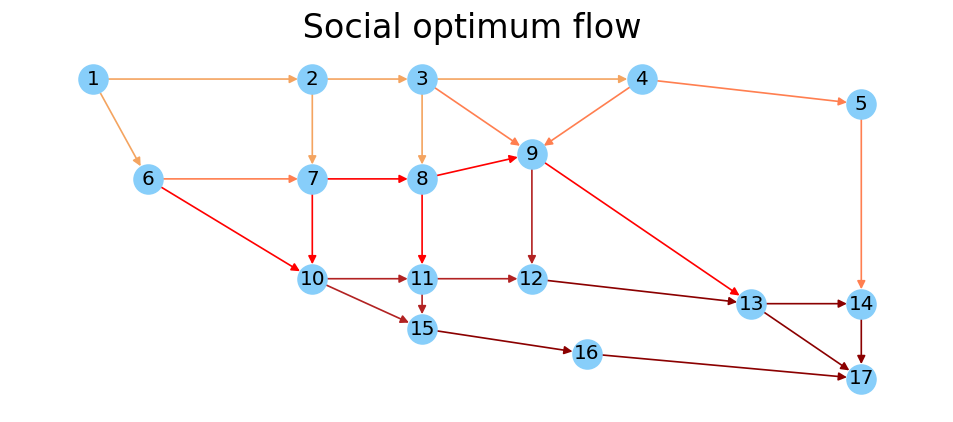

In [9]:
n_edges = len(G.edges)
f = cp.Variable(n_edges)


# Cost function social optimum
num = l * C
den = (1-cp.multiply(f,cp.inv_pos(C)))
cost_function_so = cp.multiply(num, cp.inv_pos(den)) - num

# Social optimum
social_optimum = utils_flow_optimization(f, C, B, cost_function_so)
print('The social optimum is:',social_optimum)


fig, ax = plt.subplots(figsize = (10,4), dpi=120)


edge_color = gradient_color_edges(social_optimum, G_edges_list) 

nx.draw(G, pos, with_labels = True, node_color = 'lightskyblue', edge_color = edge_color)

ax.set_title(" Social optimum flow  ", fontsize=20)
plt.savefig('fig/graph15.png')





### Question e


Find the Wardrop equilibrium $f^{(0)}$. For this, use the cost function


$$
\sum_{e \in \mathcal{E}} \int_{0}^{f_e}\tau_e(s) \ ds
$$


___Solution___

The Wardrop Equilibrium is: [6.71564895e+03 6.71564803e+03 2.36740801e+03 2.36740792e+03
 1.00903510e+04 4.64539489e+03 2.80384316e+03 2.28356194e+03
 3.41848003e+03 9.22328268e-04 1.76829408e+02 4.17141061e+03
 8.92024178e-05 2.36740792e+03 5.44495611e+03 2.35317044e+03
 4.93333832e+03 1.84155266e+03 6.97110629e+02 3.03649261e+03
 3.05028094e+03 6.08677356e+03 2.58651143e+03 1.24029072e-04
 6.91874216e+03 4.95391934e+03 4.93333845e+03 4.93333845e+03]


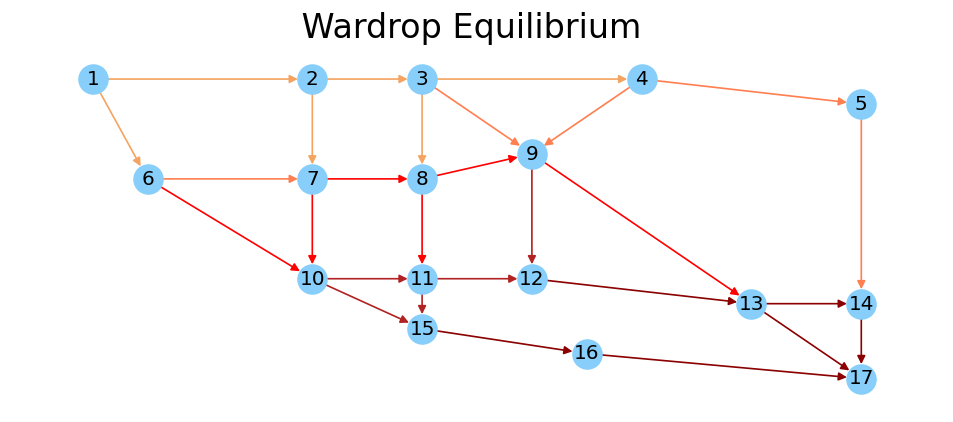

In [10]:
# Cost function of the Wardrop equilibrium
k = -cp.multiply(l, C)
arg = 1 - cp.multiply(f, cp.inv_pos(C))
cost_function_we = cp.multiply(k, cp.log(arg))
wardrop_equilibrium = utils_flow_optimization(f, C, B, cost_function_we)


print('The Wardrop Equilibrium is:',wardrop_equilibrium)


fig, ax = plt.subplots(figsize = (10,4), dpi=120)


edge_color = gradient_color_edges(wardrop_equilibrium, G_edges_list) 

nx.draw(G, pos, with_labels = True, node_color = 'lightskyblue', edge_color = edge_color)

ax.set_title(" Wardrop Equilibrium  ", fontsize=20)
plt.savefig('fig/graph16.png')




Introduce tolls, such that the toll on link $e$ is $ \omega_e = f_e^* \tau_e' (f_e^*) $ , where $f_e^*$ is the flow at the system optimum. Now the delay on link $e$ is given by $\tau_e(f_e) + \omega_e$. compute the new Wardrop equilibrium $f^{(\omega)}$.

What do you observe?


The Wardrop Equilibrium with tools is: [6.64297472e+03 6.05907677e+03 3.13247186e+03 3.13247182e+03
 1.01630252e+04 4.63825869e+03 3.00632629e+03 2.54233540e+03
 3.13149028e+03 5.83897949e+02 1.90383646e-04 2.92660472e+03
 4.66233160e-05 3.13247182e+03 5.52476655e+03 2.85422624e+03
 4.88637066e+03 2.21583035e+03 4.63991080e+02 2.33744989e+03
 3.31821726e+03 5.65566715e+03 2.37303587e+03 5.97013278e-05
 6.41412156e+03 5.50550769e+03 4.88637072e+03 4.88637072e+03]


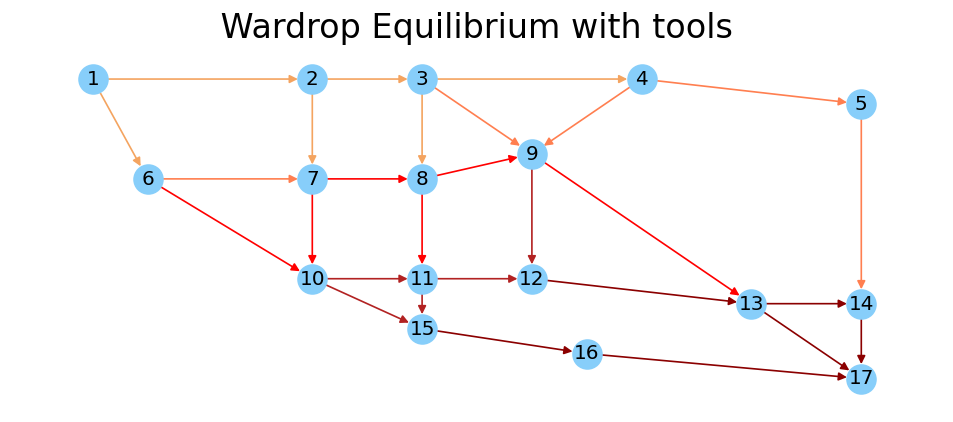

In [11]:
# Cost function of Wardrop Equilibrium with tolls
num = l * C 
w = social_optimum * (num/np.square(C-social_optimum)) # Tolls
cost_function_wwt = cost_function_we + cp.multiply(f, w)
w_e_withtools = utils_flow_optimization(f, C, B, cost_function_wwt) # Wardrop equilibrium with tools

print('The Wardrop Equilibrium with tools is:',w_e_withtools)


fig, ax = plt.subplots(figsize = (10,4), dpi=120)


edge_color = gradient_color_edges(w_e_withtools, G_edges_list) 

nx.draw(G, pos, with_labels = True, node_color = 'lightskyblue', edge_color = edge_color)

ax.set_title(" Wardrop Equilibrium with tools ", fontsize=20)
plt.savefig('fig/graph17.png')






As we can see from the output of the previous exercises, the system optimum flow and the flow in Wardrop equilibrium with tolls are very close to each other. The following graph will demostrate it:

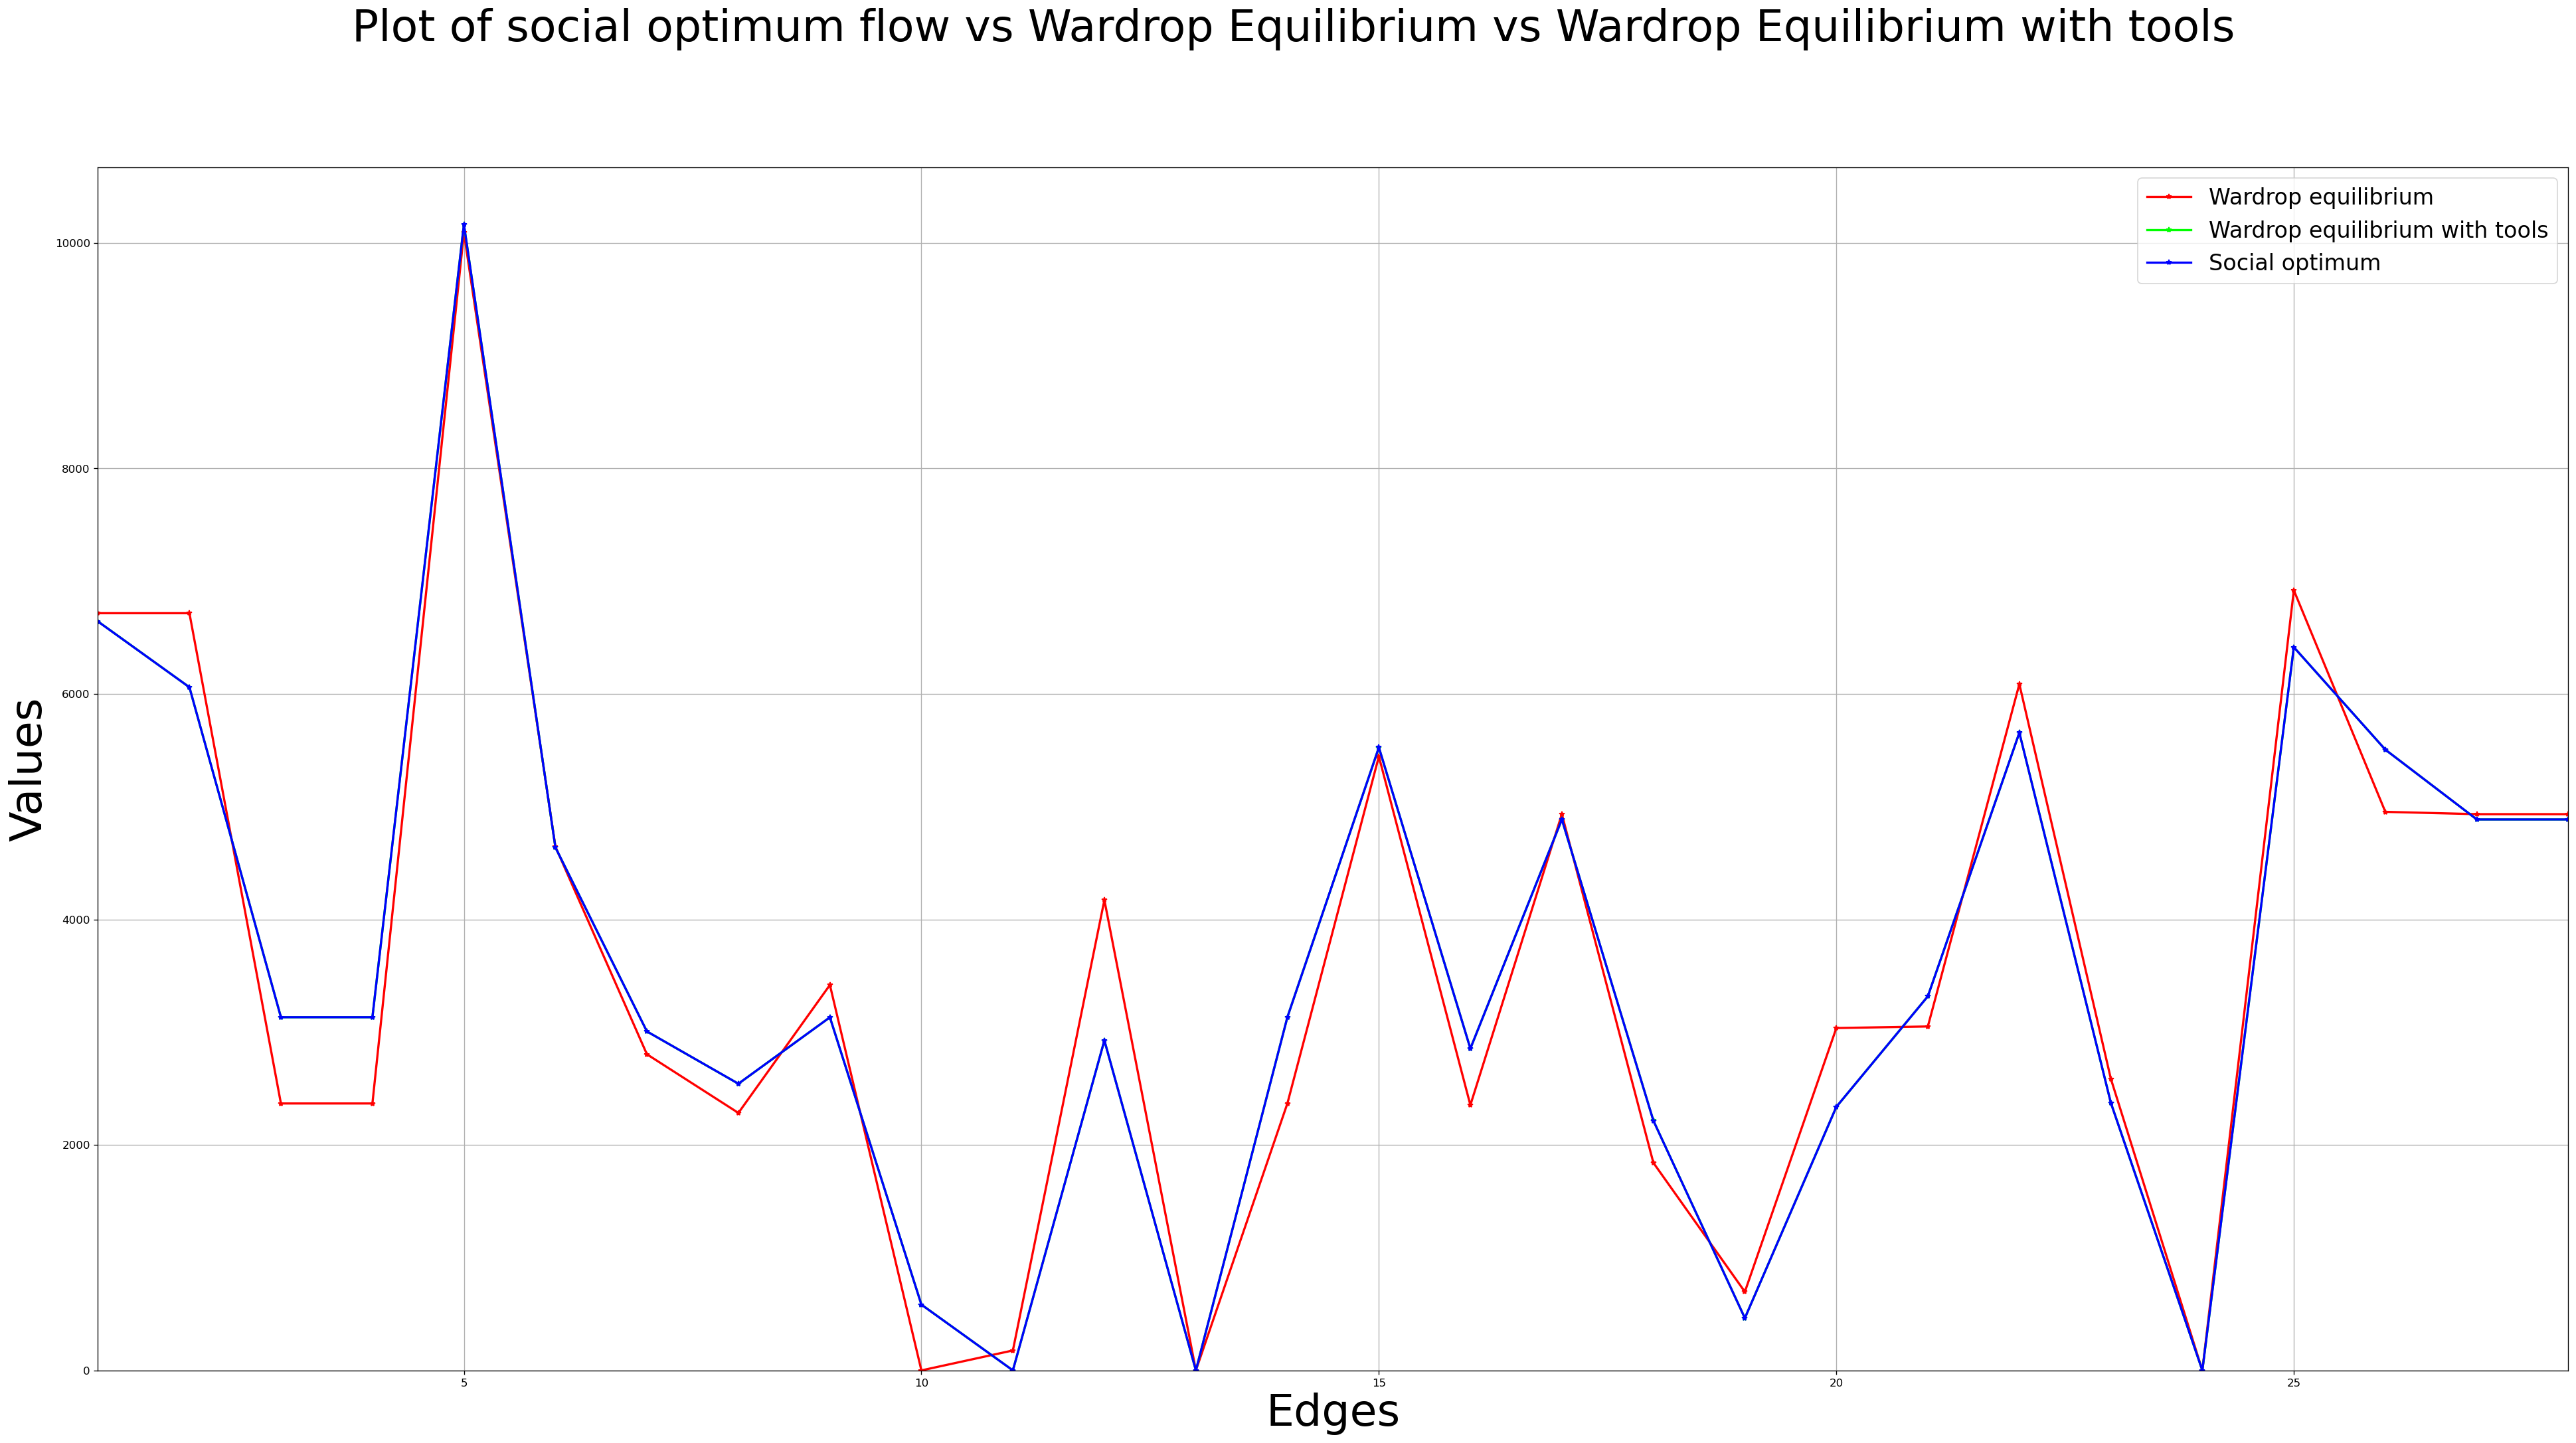

In [12]:
fig,ax = plt.subplots(figsize=(40,20),dpi=120)


ax.plot(np.linspace(1, 28, 28), wardrop_equilibrium, color ='red', marker='*',linewidth=2, markersize=5, label = 'Wardrop equilibrium')
ax.plot(np.linspace(1, 28, 28), w_e_withtools, color ='lime', marker='*',linewidth=2, markersize=5, label = 'Wardrop equilibrium with tools')
ax.plot(np.linspace(1, 28, 28), social_optimum, color ='blue', marker='*',linewidth=2, markersize=5, label = 'Social optimum')





ax.set_xlabel("Edges", fontsize = 40)
ax.set_xlim(left = 1.0, right = 28)

ax.set_ylabel("Values", fontsize = 40)
ax.set_ylim(bottom = 0.0)

ax.legend(fontsize = 20)
ax.grid()

fig.suptitle('Plot of social optimum flow vs Wardrop Equilibrium vs Wardrop Equilibrium with tools', fontsize=40)
plt.savefig('fig/graph18.png')



plt.show()



### Question f

Instead of the total travel time, let the cost for the system be the total additional delay compared to the total delay in free flow, given by

$$ \psi_e(f_e) = f_e(\tau_e(f_e)-l_e) $$

subject to the flow constraints. Compute the system optimum $f^*$ for the costs above. Construct tolls $\omega^*$ such that the Wardrop equilibrium $f^{(\omega^*)}$ coincides with $f^∗$. Compute the new Wardrop equilibrium with the constructed tolls $f^{(\omega^*)}$ to verify your result.

___Solution___

We have to update the cost function of the social optimum and the one of the Wardrop equilibrium. 

In [13]:
# Difference with previous cost function
tosubtract = cp.multiply(l, f)
# update cost function of social optimum
cost_function_so -= tosubtract
# update cost function of Wardrop equilibrium
cost_function_we -= tosubtract
# update tools
num = l * C 
w = social_optimum * (num/np.square(C-social_optimum)) # Tolls
cost_function_wwt = cost_function_we + cp.multiply(f, w)


social_optimum = utils_flow_optimization(f, C, B, cost_function_so)
print('The social optimum is:\n',social_optimum)



wardrop_equilibrium = utils_flow_optimization(f, C, B, cost_function_we)
print('\nThe Wardrop Equilibrium is:\n',wardrop_equilibrium)


w_e_withtools = utils_flow_optimization(f, C, B, cost_function_wwt) # Wardrop equilibrium with tools
print('\nThe Wardrop Equilibrium with tools is:\n',w_e_withtools)

print('\nThe tools are:\n', w)




The social optimum is:
 [6.65329658e+03 5.77466230e+03 3.41971657e+03 3.41971062e+03
 1.01527034e+04 4.64278036e+03 3.10584008e+03 2.66218478e+03
 3.00907935e+03 8.78634280e+02 7.42401749e-03 2.35493830e+03
 5.94907576e-03 3.41971062e+03 5.50992306e+03 3.04369256e+03
 4.88180506e+03 2.41557456e+03 4.43662730e+02 2.00804968e+03
 3.48735309e+03 5.49540277e+03 2.20377848e+03 2.20338871e-03
 6.30070364e+03 5.62348910e+03 4.88180726e+03 4.88180726e+03]

The Wardrop Equilibrium is:
 [6.78171861e+03 6.00489674e+03 3.26626641e+03 3.26625120e+03
 1.00242813e+04 4.66556349e+03 3.02889540e+03 2.64103584e+03
 3.03881982e+03 7.76821866e+02 2.40309308e+02 2.49832102e+03
 1.52097661e-02 3.26625120e+03 5.35871777e+03 2.88151993e+03
 4.89068780e+03 2.41348995e+03 6.28168876e+02 2.10055225e+03
 3.50968657e+03 5.61023882e+03 2.26259310e+03 2.23404879e-03
 6.38646554e+03 5.52884430e+03 4.89069003e+03 4.89069003e+03]

The Wardrop Equilibrium with tools is:
 [6.71028186e+03 4.94902393e+03 4.00879784e+03 4.0

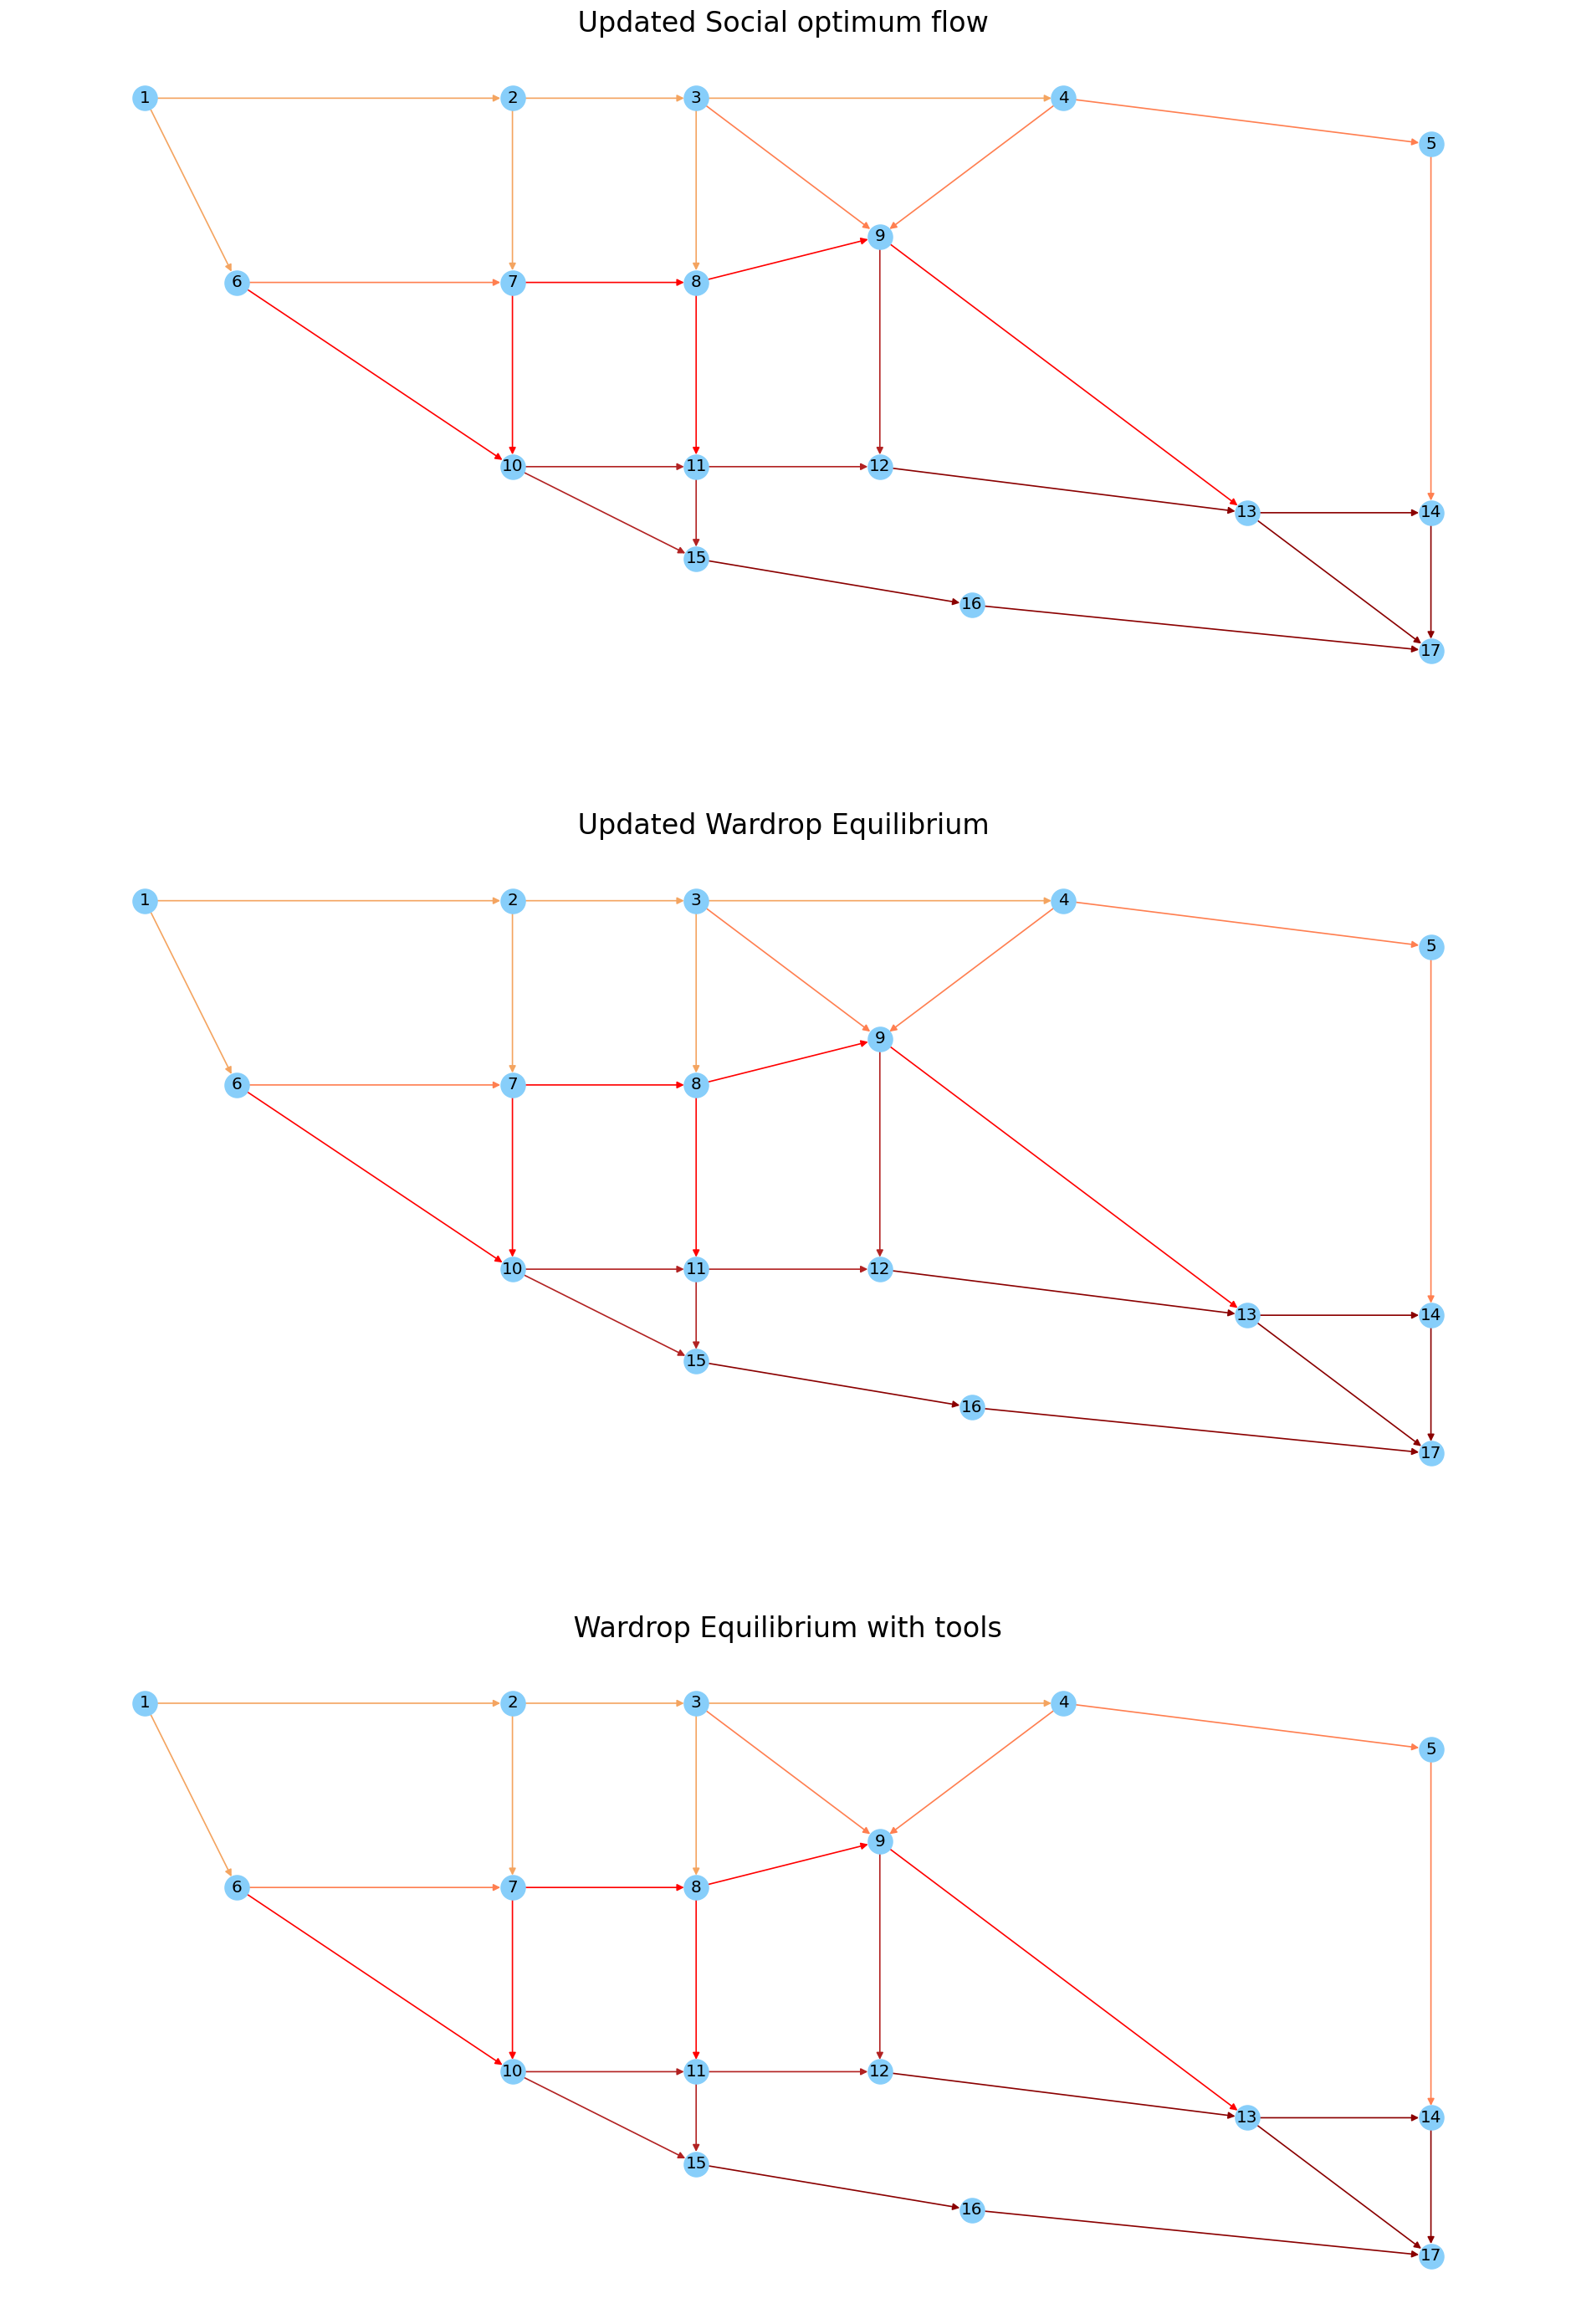

In [14]:
fig, ax = plt.subplots(3,1, figsize = (20,30), dpi=120)


edge_color_so2 = gradient_color_edges(social_optimum, G_edges_list) 
edge_color_we2 = gradient_color_edges(wardrop_equilibrium, G_edges_list) 
edge_color_wwt2 = gradient_color_edges(w_e_withtools, G_edges_list) 



nx.draw(G, pos, with_labels = True, node_color = 'lightskyblue', edge_color = edge_color_so2, ax = ax[0])
nx.draw(G, pos, with_labels = True, node_color = 'lightskyblue', edge_color = edge_color_we2, ax = ax[1])
nx.draw(G, pos, with_labels = True, node_color = 'lightskyblue', edge_color = edge_color_wwt2, ax = ax[2])



ax[0].set_title(" Updated Social optimum flow  ", fontsize=20)
ax[1].set_title(" Updated Wardrop Equilibrium  ", fontsize=20)
ax[2].set_title(" Wardrop Equilibrium with tools ", fontsize=20)






plt.savefig('fig/graph19.png')



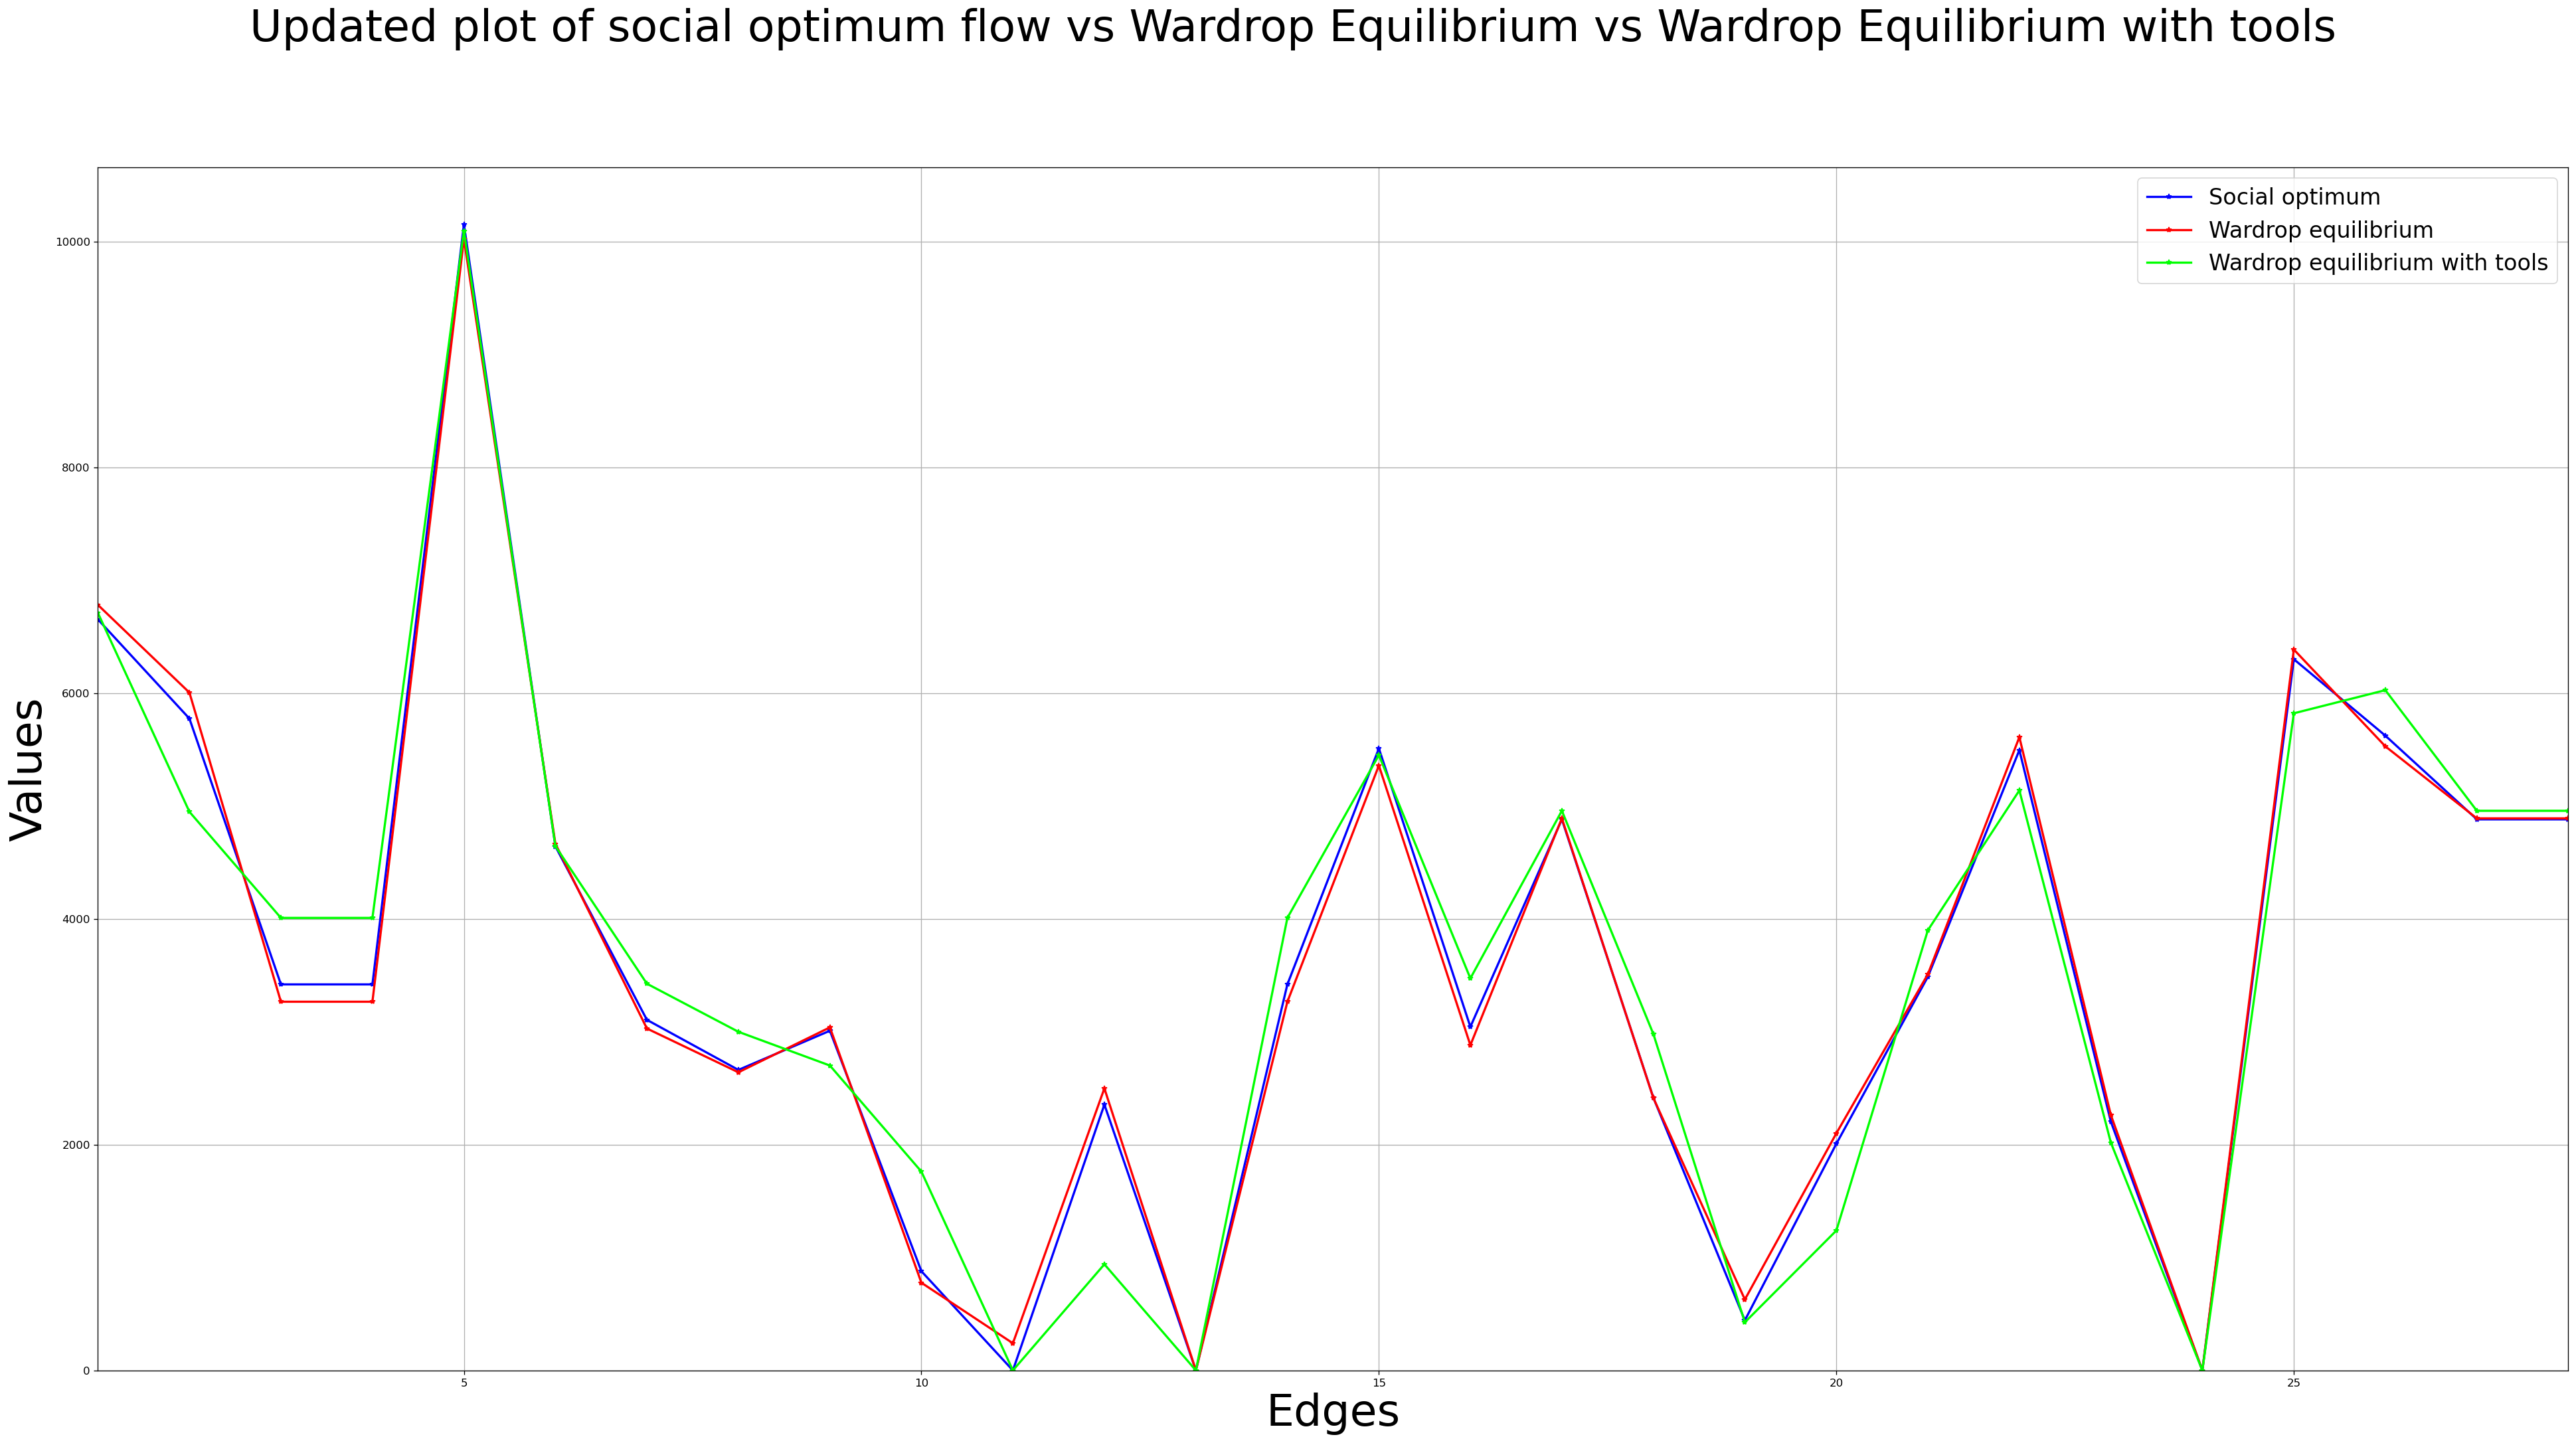

In [15]:
fig,ax = plt.subplots(figsize=(40,20),dpi=120)

ax.plot(np.linspace(1, 28, 28), social_optimum, color ='blue', marker='*',linewidth=2, markersize=5, label = 'Social optimum')
ax.plot(np.linspace(1, 28, 28), wardrop_equilibrium, color ='red', marker='*',linewidth=2, markersize=5, label = 'Wardrop equilibrium')
ax.plot(np.linspace(1, 28, 28), w_e_withtools, color ='lime', marker='*',linewidth=2, markersize=5, label = 'Wardrop equilibrium with tools')



ax.set_xlabel("Edges", fontsize = 40)
ax.set_xlim(left = 1.0, right = 28)

ax.set_ylabel("Values", fontsize = 40)
ax.set_ylim(bottom = 0.0)

ax.legend(fontsize = 20)
ax.grid()

fig.suptitle('Updated plot of social optimum flow vs Wardrop Equilibrium vs Wardrop Equilibrium with tools', fontsize=40)
plt.savefig('fig/graph20.png')



plt.show()